## Pneumonia Identification - A Neural Network Model

Pneumonia description

Business Case - IHC

In [106]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os, shutil
from PIL import Image
import scipy
from scipy import ndimage

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(123)

## Load Data 

In [107]:
train = tf.keras.preprocessing.image_dataset_from_directory('chest_xray/train', labels = 'inferred', 
                                                            class_names = ['NORMAL', 'PNEUMONIA'])

Found 5216 files belonging to 2 classes.


In [108]:
test = tf.keras.preprocessing.image_dataset_from_directory('chest_xray/test', labels = 'inferred',
                                                          class_names = ['NORMAL', 'PNEUMONIA'])

Found 624 files belonging to 2 classes.


In [109]:
val = tf.keras.preprocessing.image_dataset_from_directory('chest_xray/val', labels = 'inferred',
                                                         class_names = ['NORMAL', 'PNEUMONIA'])

Found 16 files belonging to 2 classes.


Pediatric Lung Image - NORMAL


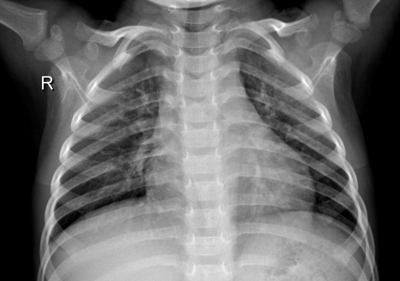

Pediatric Lung Image - PNEUMONIA (viral origins)


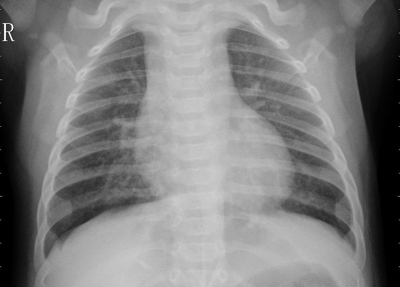

Pediatric Lung Image - PNEUMONIA (bacterial origins)


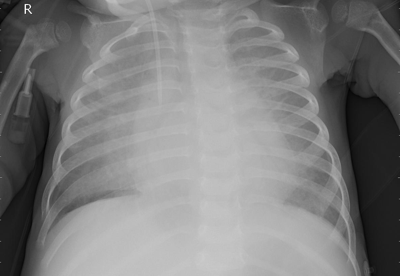

In [124]:
#Display normal lung image

print('Pediatric Lung Image - NORMAL')

norm_img = Image.open('chest_xray/train/NORMAL/IM-0125-0001.jpeg')
norm_img.thumbnail((400, 400))
display(norm_img);

# Display pneumonia image with viral origins

print('Pediatric Lung Image - PNEUMONIA (viral origins)')

p_img = Image.open('chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
p_img.thumbnail((400, 400))
display(p_img);

# Display pneumonia image with bacterial origins

print('Pediatric Lung Image - PNEUMONIA (bacterial origins)')

p_img = Image.open('chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg')
p_img.thumbnail((400, 400))
display(p_img);


## Process the datasets for modeling

In [112]:
# Identify shape of each dataset
print('Shape and Datatype of Train dataset:', train)
print()
print('Shape and Datatype of Val dataset:', val)
print()
print('Shape and Datatype of Test dataset:', test)

Shape and Datatype of Train dataset: <BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

Shape and Datatype of Val dataset: <BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

Shape and Datatype of Test dataset: <BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [113]:
# plot histogram showing classes - normal and pneumonia



In [116]:
#identify file path
train_folder = 'chest_xray/train'
val_folder = 'chest_xray/val'
test_folder = 'chest_xray/test'

In [120]:
# get all the data in the directory, and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 624) 

# get all the data in the directory, and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 16)

# get all the data in the directory, and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size = 5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [121]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [122]:
#reshape for deep learning
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 12288)
(624, 12288)
(16, 12288)


In [123]:
#reshape labels
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

## 1. Build a baseline model

Build a simple baseline model using densely connected layers. 

In [135]:
# Neural network model
baseline_model = Sequential()

# No hidden layers

#Input
baseline_model.add(Dense(16, activation='relu', input_shape=(12288,))) 

# Binary output
baseline_model.add(Dense(1, activation='sigmoid'))

In [136]:
baseline_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

base_history = baseline_model.fit(train_img,
                    train_y,
                    epochs=12,
                    batch_size=32,
                    validation_data = (val_img, val_y))

Epoch 1/12
163/163 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7878 - val_loss: 0.7944 - val_accuracy: 0.6250
Epoch 2/12
163/163 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8725 - val_loss: 0.7998 - val_accuracy: 0.6250
Epoch 3/12
163/163 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9018 - val_loss: 0.4466 - val_accuracy: 0.8125
Epoch 4/12
163/163 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.9005 - val_loss: 0.4242 - val_accuracy: 0.8125
Epoch 5/12
163/163 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.9179 - val_loss: 0.3218 - val_accuracy: 0.9375
Epoch 6/12
163/163 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9279 - val_loss: 0.3555 - val_accuracy: 0.8750
Epoch 7/12
163/163 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9312 - val_loss: 0.3774 - val_accuracy: 0.8125
Epoch 

In [139]:
# Baseline training results
base_results_train = baseline_model.evaluate(train_img, train_y)

163/163 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9553


In [141]:
base_results_test = baseline_model.evaluate(test_img, test_y)

20/20 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7740


In [143]:
#Print results for train and test
print("Baseline Results from Training Data:", base_results_train)
print()
print("Baseline Results from Test Data:", base_results_test)



Baseline Results from Training Data: [0.11327246576547623, 0.9553297758102417]

Baseline Results from Test Data: [0.6545490026473999, 0.7740384340286255]


In [144]:
# Plot train and test loss and accuracy
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

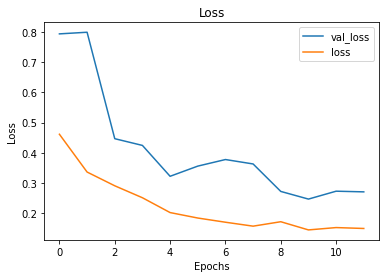

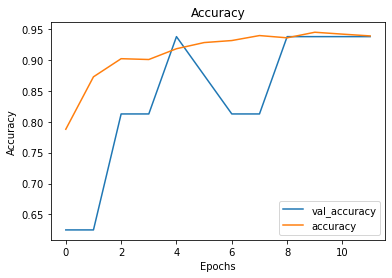

In [145]:
visualize_training_results(base_history)

#### Model Evaluation

What is going on here most likely?

## CNN Model - First Iteration

Include convolution, maxpooling, and 2 hidden layers.

In [150]:
#Instantiate a CNN model

model_1 = Sequential()

# Add convolution layer

model_1.add(Conv2D(32, (3, 3), activation = 'relu',
                   input_shape= (64, 64, 3)))

# Add a maxpooling layer

model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer

model_1.add(Conv2D(32, (4, 4), activation='relu'))

# Add another maxpooling layer

model_1.add(MaxPooling2D((2, 2)))

# Flatten the model

model_1.add(Flatten())

# Add dense layers, two hidden

model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(7, activation = 'relu'))
model_1.add(Dense(5, activation = 'relu'))

# Add the output layer for binary - normal or pneumonia

model_1.add(Dense(1))
model_1.add(Activation('sigmoid'))

# Compile the model with binary cross entropy as loss and rmsprop for optimizer

model_1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [152]:
# Examine the built model
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                401472    
_________________________________________________________________
dense_17 (Dense)             (None, 7)                

In [182]:

history_1 = model_1.fit(train_images, 
                        train_y, 
                        epochs=20, 
                        #validation_data=(val_images, val_y)
                        validation_split = 0.2) 
                                

Epoch 1/20
131/131 [==============================] - 8s 64ms/step - loss: 0.0373 - accuracy: 0.9933 - val_loss: 0.0347 - val_accuracy: 0.9943
Epoch 2/20
131/131 [==============================] - 8s 63ms/step - loss: 0.0410 - accuracy: 0.9909 - val_loss: 0.0506 - val_accuracy: 0.9875
Epoch 3/20
131/131 [==============================] - 8s 64ms/step - loss: 0.0365 - accuracy: 0.9914 - val_loss: 0.0550 - val_accuracy: 0.9828
Epoch 4/20
131/131 [==============================] - 8s 64ms/step - loss: 0.0380 - accuracy: 0.9930 - val_loss: 0.0341 - val_accuracy: 0.9933
Epoch 5/20
131/131 [==============================] - 8s 64ms/step - loss: 0.0394 - accuracy: 0.9916 - val_loss: 0.0556 - val_accuracy: 0.9828
Epoch 6/20
131/131 [==============================] - 9s 66ms/step - loss: 0.0486 - accuracy: 0.9933 - val_loss: 0.0372 - val_accuracy: 0.9914
Epoch 7/20
131/131 [==============================] - 9s 66ms/step - loss: 0.0351 - accuracy: 0.9947 - val_loss: 0.0321 - val_accuracy: 0.9923

In [183]:
results_1_train = model_1.evaluate(train_images, train_y)

163/163 [==============================] - 2s 11ms/step - loss: 0.0575 - accuracy: 0.9812


In [184]:
results_1_test = model_1.evaluate(test_images, test_y)

20/20 [==============================] - 0s 11ms/step - loss: 3.0473 - accuracy: 0.8381


In [185]:
#Print results for Model 1 train and test
print("Model 1 Results from Training Data:", results_1_train)
print()
print("Model 1 Results from Test Data:", results_1_test)



Model 1 Results from Training Data: [0.05753031373023987, 0.9812116622924805]

Model 1 Results from Test Data: [3.047300338745117, 0.8381410241127014]


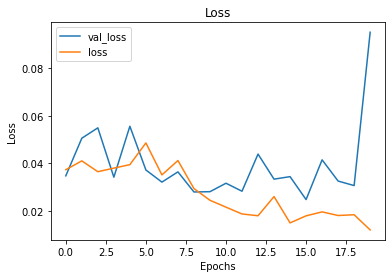

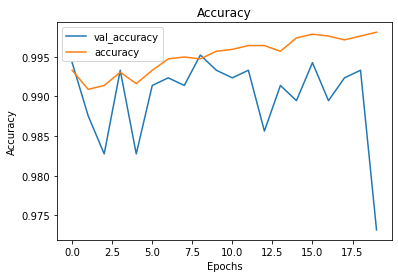

In [186]:
visualize_training_results(history_1)

#### Model Evaluation

What is gonig on here most likely?

## 2.  Data Augmentation 

In [192]:
# Check class imbalance in train

# How do I do this?


In [179]:
# Augment the training data to account for class imbalance
train_datagen = ImageDataGenerator(rescale=1./255, 
                             #featurewise_center=True,
                             #featurewise_std_normalization=True,
                             rotation_range=30, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.15, 
                             horizontal_flip=True)

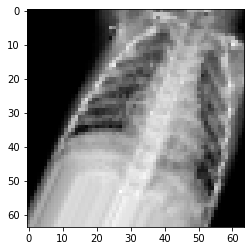

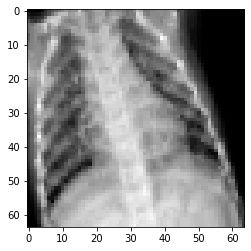

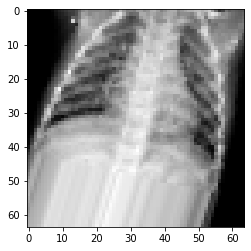

In [181]:
# View an augmented image

# Load image
img = load_img('chest_xray/train/NORMAL/IM-0125-0001.jpeg', target_size=(64, 64))

# Reshape
reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 

# Run image through augmented image generator

i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
        
plt.show()

## Padding and Stride

## Final model with added layering and adam optimizer


## Evaluate Final Model

In [70]:
# Create 

In [193]:

#model_1.save_weights('model_1.h5')

In [104]:
predictions = np.argmax(model_1.predict_classes(test_generator), axis =1)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#plot confusion matrix

In [ ]:
#

In [ ]:
datagen = ImageDataGenerator

44
